<a href="https://colab.research.google.com/github/shreyabhuwania/Music-Genre-Classification/blob/main/Model_Training_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import keras
import matplotlib.pyplot as plt
import random
import librosa
import math

In [ ]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    mapping = data["mapping"]

    print("Data succesfully loaded!")

    return  X, y, mapping


In [ ]:
# path to json
DATA_PATH = "/content/drive/MyDrive/Music_Genre_Dataset/mfcc_data.json"

# load data
X, y, mapping = load_data(DATA_PATH)

Data succesfully loaded!


In [ ]:
X.shape

(9986, 130, 13)

In [ ]:
y.shape

(9986,)

In [ ]:
mapping

['reggae',
 'disco',
 'jazz',
 '.ipynb_checkpoints',
 'rock',
 'classical',
 'hiphop',
 'blues',
 'pop',
 'country',
 'metal']

In [ ]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


In [ ]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 10)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]


X_train.shape

(5991, 130, 13, 1)

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2])
#input_shape_cnn = (X_train.shape[2], 1)
"""
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', use_bias = True, input_shape=input_shape_cnn))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
#model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', use_bias = True))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
#model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu', use_bias = True))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
#model_cnn.add(keras.layers.BatchNormalization())



# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
"""

model = keras.Sequential()
#model.add(keras.layers.TimeDistributed(model_cnn, input_shape=input_shape))
model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences = True))
model.add(keras.layers.LSTM(128))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))


# output layer
model.add(keras.layers.Dense(12, activation='softmax'))




# compile model
opt = keras.optimizers.Adam(learning_rate=0.001)
opt1 = keras.optimizers.RMSprop()
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#model.build(input_shape)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 130, 64)           19968     
                                                                 
 lstm_11 (LSTM)              (None, 128)               98816     
                                                                 
 dense_12 (Dense)            (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 12)               

In [ ]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
188/188 [==============================] - 7s 25ms/step - loss: 1.9697 - accuracy: 0.3101 - val_loss: 1.6453 - val_accuracy: 0.4099
Epoch 2/50
188/188 [==============================] - 3s 14ms/step - loss: 1.6394 - accuracy: 0.4163 - val_loss: 1.4753 - val_accuracy: 0.4746
Epoch 3/50
188/188 [==============================] - 3s 14ms/step - loss: 1.5177 - accuracy: 0.4635 - val_loss: 1.3783 - val_accuracy: 0.4953
Epoch 4/50
188/188 [==============================] - 3s 14ms/step - loss: 1.4336 - accuracy: 0.4976 - val_loss: 1.3788 - val_accuracy: 0.5134
Epoch 5/50
188/188 [==============================] - 3s 17ms/step - loss: 1.3725 - accuracy: 0.5216 - val_loss: 1.3212 - val_accuracy: 0.5274
Epoch 6/50
188/188 [==============================] - 4s 19ms/step - loss: 1.3013 - accuracy: 0.5465 - val_loss: 1.2220 - val_accuracy: 0.5634
Epoch 7/50
188/188 [==============================] - 3s 14ms/step - loss: 1.2729 - accuracy: 0.5548 - val_loss: 1.2378 - val_accuracy: 0.5501

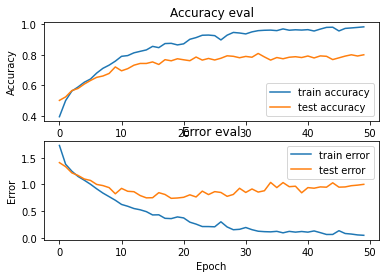

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [ ]:
# evaluate model on Test Set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 1s - loss: 1.0900 - accuracy: 0.7817 - 564ms/epoch - 7ms/step

Test accuracy: 0.7817381024360657


In [ ]:
model.save("/content/drive/MyDrive/Music_Genre_Dataset/Music_Genre_LSTM")

In [ ]:
model.save("/content/drive/MyDrive/Music_Genre_Dataset/Music_Genre_LSTM.h5")

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/Music_Genre_Dataset/Music_Genre_LSTM.h5")

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9284936785697937
Test accuracy: 0.7857428789138794


In [ ]:
score

[0.9284936785697937, 0.7857428789138794]

In [ ]:
y_pred = []

for a in X_test:

  x_to_test = a[np.newaxis, ...]
  prediction = model.predict(x_to_test, verbose = 0)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)
  y_hat = int(predicted_index)
  y_pred.append(y_hat)
  print(a)


In [ ]:
temp = np.array(y_pred)

In [ ]:
y_pred = temp

In [ ]:
keras.metrics.categorical_accuracy(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [ ]:
import sklearn

In [ ]:
correct = 0
for a, b in zip(y_test, y_pred):
  if a==b:
    correct += 1

In [ ]:
correct

1962

In [ ]:
len(y_test)

2497

In [ ]:
correct/len(y_test)

0.7857428914697637

In [ ]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.7857428914697637

In [ ]:
sklearn.metrics.precision_score(y_test, y_pred, average=None)

array([0.80973451, 0.77459016, 0.7896679 , 0.62692308, 0.92276423,
       0.78378378, 0.78571429, 0.85      , 0.64750958, 0.8907563 ])

In [ ]:
sklearn.metrics.recall_score(y_test, y_pred, average=None)

array([0.70930233, 0.71863118, 0.8359375 , 0.63178295, 0.91164659,
       0.77186312, 0.81481481, 0.82926829, 0.78604651, 0.86178862])

In [ ]:
sklearn.metrics.f1_score(y_test, y_pred, average=None)

array([0.75619835, 0.74556213, 0.81214421, 0.62934363, 0.91717172,
       0.77777778, 0.8       , 0.83950617, 0.71008403, 0.87603306])

In [ ]:
sklearn.metrics.jaccard_score(y_test, y_pred, average = 'weighted')

0.6547766647993974

In [ ]:
sklearn.metrics.recall_score(y_test, y_pred, average = 'macro')

0.7871081891252985

In [ ]:
mapping

['reggae',
 'disco',
 'jazz',
 '.ipynb_checkpoints',
 'rock',
 'classical',
 'hiphop',
 'blues',
 'pop',
 'country',
 'metal']

In [ ]:
genres = ['Reggae', 'Disco', 'Jazz', 'Rock', 'Classical', 'Hiphop', 'Blues', 'Pop', 'Country', 'Metal']

acc_score = sklearn.metrics.accuracy_score(y_test, y_pred)
j_score = sklearn.metrics.jaccard_score(y_test, y_pred, average = 'weighted')
j_classes = sklearn.metrics.jaccard_score(y_test, y_pred, average = None)
f1 = sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
f1_classes = sklearn.metrics.f1_score(y_test, y_pred, average=None)
precision = sklearn.metrics.precision_score(y_test, y_pred, average='weighted')
precision_classes = sklearn.metrics.precision_score(y_test, y_pred, average=None)
recall = sklearn.metrics.recall_score(y_test, y_pred, average='weighted')
recall_classes = sklearn.metrics.recall_score(y_test, y_pred, average=None)



In [ ]:
print("Model Accuracy Metric: -")

print(f"Total Accuracy Score              :  {acc_score}" )
print(f"Weighted Average Jaccard Score    :  {j_score}" )
print(f"Weighted Average F1 Score         :  {f1}" )
print(f"Weighted Average Precision Score  :  {precision}" )
print(f"Weighted Average Recall Score     :  {recall}" )

Model Accuracy Metric: -
Total Accuracy Score              :  0.7857428914697637
Weighted Average Jaccard Score    :  0.6547766647993974
Weighted Average F1 Score         :  0.786337052332904
Weighted Average Precision Score  :  0.789268106523539
Weighted Average Recall Score     :  0.7857428914697637


In [ ]:
j_classes

array([0.60797342, 0.59433962, 0.68370607, 0.45915493, 0.84701493,
       0.63636364, 0.66666667, 0.72340426, 0.5504886 , 0.77941176])

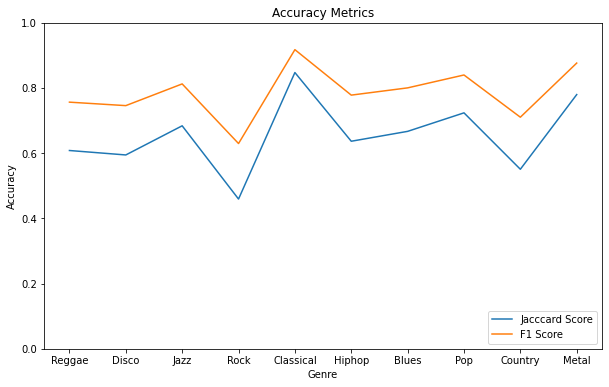

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(genres, j_classes, label="Jacccard Score")
plt.plot(genres, f1_classes, label="F1 Score")

plt.ylim(0, 1)
plt.xlabel("Genre")
plt.ylabel("Accuracy")
plt.title('Accuracy Metrics')
plt.legend(loc="lower right")
plt.show()

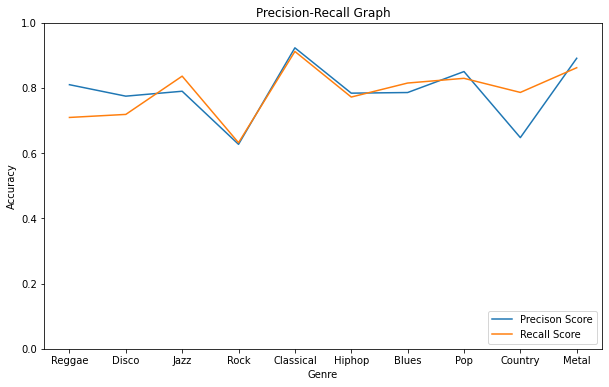

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(genres, precision_classes, label="Precison Score")
plt.plot(genres, recall_classes, label="Recall Score")

plt.ylim(0, 1)
plt.xlabel("Genre")
plt.ylabel("Accuracy")
plt.title('Precision-Recall Graph')
plt.legend(loc="lower right")
plt.show()